# Predicting the maximum temperature based on the minimum. hydrological data of roshydromet for moscow starting from 10.02.2017 to 15.12.2020 
http://www.meteorf.ru/opendata/7703092752-gidro/

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import unicode_literals

In [128]:
weather_df = pd.read_csv('weather_df.csv', sep=';')
weather_df.head(20)

,Code,ForecastDate,ForecastType,ForecastStart,ForecastEnd,PrecipitationProbability,WeatherConditions,PrecipitationType,ExpectedPrecipitationAmount,MinimumTemperature,MaximumTemperature,WindDirection,WindSpeed,PrecipitationAmountDay,Notes,global_id
0,511556,10.02.2017 17:59,двенадцатичасовой прогноз,10.02.2017 21:00,11.02.2017 09:00,NaN,NaN,без осадков,NaN,-4,-2,NaN,NaN,NaN,"Условия для гололедицы, ожидаемый прирост снег...",870650874
1,516104,29.06.2018 06:02,трехчасовой прогноз,29.06.2018 09:00,29.06.2018 12:00,NaN,NaN,дождь,NaN,27,29,NaN,NaN,NaN,Днем без осадков. Температура 27…29 град. Вете...,870667626
2,516101,26.06.2018 05:54,трехчасовой прогноз,26.06.2018 09:00,26.06.2018 12:00,NaN,NaN,без осадков,NaN,24,26,NaN,NaN,NaN,Днем без осадков. Температура 24…26 град. Вете...,870669879
3,516103,28.06.2018 05:35,трехчасовой прогноз,28.06.2018 09:00,28.06.2018 12:00,NaN,NaN,без осадков,NaN,27,29,NaN,NaN,NaN,Днем без осадков. Температура 27…29 град. Вете...,870669880
4,516102,27.06.2018 05:35,трехчасовой прогноз,27.06.2018 09:00,27.06.2018 12:00,NaN,NaN,без осадков,NaN,26,28,NaN,NaN,NaN,Днем без осадков. Температура 26…28 град. Вете...,870669882
5,514857,23.02.2018 05:59,трехчасовой прогноз,23.02.2018 09:00,23.02.2018 12:00,NaN,NaN,без осадков,NaN,-11,-9,NaN,NaN,NaN,"Днем местами слабый снег 0-0,2 мм. Тем-ра -11…...",870722712
6,514859,25.02.2018 06:01,трехчасовой прогноз,25.02.2018 07:00,25.02.2018 10:00,NaN,NaN,без осадков,NaN,-13,-11,NaN,NaN,NaN,"Днем местами слабый снег 0-0,2 мм. Тем-ра -13…...",870722713
7,514936,17.03.2018 06:03,трехчасовой прогноз,17.03.2018 06:30,17.03.2018 09:30,NaN,NaN,без осадков,NaN,-10,-8,NaN,NaN,NaN,"Днем местами слабый снег 0-0,2 мм. Температура...",870722715
8,514957,19.03.2018 06:12,трехчасовой прогноз,19.03.2018 09:00,19.03.2018 12:00,NaN,NaN,без осадков,NaN,-2,0,NaN,NaN,NaN,"Днем местами слабый снег 0-0,2 мм. Условия для...",870722716
9,515036,29.03.2018 06:05,трехчасовой прогноз,29.03.2018 06:30,29.03.2018 09:30,NaN,NaN,без осадков,NaN,-1,1,NaN,NaN,NaN,Без осадков. Условия для гололедицы. Температу...,870722717


In [129]:
minT = weather_df['MinimumTemperature'].astype('int').values.reshape(-1,1)
maxT = weather_df['MaximumTemperature'].astype('int').values.reshape(-1,1)

In [130]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(minT, maxT, test_size=1/5, random_state=0)

In [131]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)

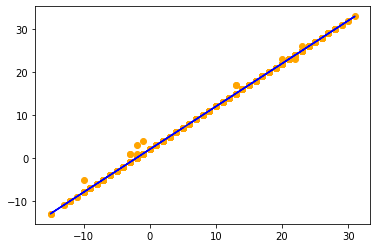

In [132]:
plt.scatter(x_train,y_train,color='orange')
plt.plot(x_train,regressor.predict(x_train),c='blue')
plt.show()

In [133]:
userWord = []
arraySize = int(input("Enter the number of minimum temperature values you are going to enter "))
for i in range(arraySize):
    userWord.append(float(input("Element:")))
userWord = np.array(userWord).reshape(-1,1)
print("Results")
for z in userWord:
    print("Minimal temperature:",z.astype('int'),"Predicted Maximal temperature:",regressor.predict([z]))


Enter the number of minimum temperature values you are going to enter 


ValueError: invalid literal for int() with base 10: ''

# Let's look at the tSNE distribution of average temperature values above and below zero

In [144]:
meanTemp = weather_df[['MinimumTemperature','MaximumTemperature']].astype("float").mean(axis=1)

In [145]:
weather_df['MeanTemperature'] = meanTemp

In [136]:
def parse_values(x):
    if x < 0:
        return True
    else:
        return False

In [137]:
weather_df['ColdHot'] = weather_df['MeanTemperature'].apply(parse_values)

In [138]:
weather_df['ColdHot'].astype('int')

0       1
1       0
2       0
3       0
4       0
       ..
1079    1
1080    1
1081    1
1082    1
1083    1
Name: ColdHot, Length: 1084, dtype: int64

In [139]:
new_df = weather_df[['MeanTemperature','ColdHot','MinimumTemperature','MaximumTemperature']]

In [140]:
from sklearn.manifold import TSNE

In [141]:
tsne = TSNE(random_state=0)

In [142]:
%%time
tsne.fit(new_df);

CPU times: user 15.4 s, sys: 165 ms, total: 15.6 s
Wall time: 4.17 s


TSNE(random_state=0)

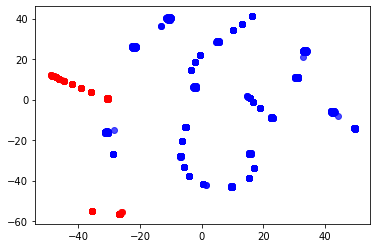

In [143]:
plt.scatter(tsne.embedding_[new_df['ColdHot'].values, 0], # When weather is above zero
            tsne.embedding_[new_df['ColdHot'].values, 1], 
            color='red', alpha=.7);
plt.scatter(tsne.embedding_[~new_df['ColdHot'].values, 0], # When weather is below zero
            tsne.embedding_[~new_df['ColdHot'].values, 1], 
            color='blue', alpha=.7);